In [1]:
#Import the libraries

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt # for visualization
%matplotlib inLine
sns.set(color_codes=True) 

import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings

In [2]:
#load datasets
exports = pd.read_csv("Exports materials.csv")

In [3]:
exports.head()

,country,variable,group,Unit,Date,Value
0,France,Exports,Construction Minerals,NaN,1990,20.4551
1,France,Exports,Construction Minerals,NaN,1991,20.5547
2,France,Exports,Construction Minerals,NaN,1992,19.8824
3,France,Exports,Construction Minerals,NaN,1993,16.3419
4,France,Exports,Construction Minerals,NaN,1994,19.0280


In [4]:
exports.isnull().sum()

country       0
variable      0
group         0
Unit        627
Date          0
Value         0
dtype: int64

In [5]:
exports.shape

(627, 6)

In [6]:
exports.describe(include=object)

,country,variable,group
count,627,627,627
unique,8,1,3
top,France,Exports,Construction Minerals
freq,93,627,209


In [7]:
#drop variable
exports = exports.drop(['variable','Unit'], axis=1)
exports = exports.rename(columns={"Value": "exports", "Date": "year"})

In [8]:
exports.head()

,country,group,year,exports
0,France,Construction Minerals,1990,20.4551
1,France,Construction Minerals,1991,20.5547
2,France,Construction Minerals,1992,19.8824
3,France,Construction Minerals,1993,16.3419
4,France,Construction Minerals,1994,19.0280


In [9]:
imports = pd.read_csv('Imports materials.csv')

In [10]:
imports.head()

,country,variable,group,Unit,Date,Value
0,France,Imports,Construction Minerals,NaN,1990,13.4569
1,France,Imports,Construction Minerals,NaN,1991,14.8171
2,France,Imports,Construction Minerals,NaN,1992,13.9346
3,France,Imports,Construction Minerals,NaN,1993,10.6789
4,France,Imports,Construction Minerals,NaN,1994,11.4869


In [11]:
imports.isnull().sum()

country       0
variable      0
group         0
Unit        627
Date          0
Value         0
dtype: int64

In [12]:
imports = imports.drop(['variable','Unit'], axis=1)
imports = imports.rename(columns={"Value": "imports", "Date": "year"})

In [13]:
imports.head()

,country,group,year,imports
0,France,Construction Minerals,1990,13.4569
1,France,Construction Minerals,1991,14.8171
2,France,Construction Minerals,1992,13.9346
3,France,Construction Minerals,1993,10.6789
4,France,Construction Minerals,1994,11.4869


In [14]:
#loading second dataset
gdp = pd.read_csv('Gdp materials.csv')

In [15]:
gdp.head()

,country,variable,group,Unit,Date,Value
0,Denmark,Gross Domestic Product Per Direct Material Inp...,Construction Minerals,NaN,1993,3.9179
1,Denmark,Gross Domestic Product Per Direct Material Inp...,Construction Minerals,NaN,1994,3.8836
2,Denmark,Gross Domestic Product Per Direct Material Inp...,Construction Minerals,NaN,1995,3.6226
3,Denmark,Gross Domestic Product Per Direct Material Inp...,Construction Minerals,NaN,1996,3.3838
4,Denmark,Gross Domestic Product Per Direct Material Inp...,Construction Minerals,NaN,1997,3.2544


In [16]:
gdp.isnull().sum()

country       0
variable      0
group         0
Unit        625
Date          0
Value         0
dtype: int64

In [17]:
gdp.describe(include=object)

,country,variable,group
count,625,625,625
unique,8,1,3
top,France,Gross Domestic Product Per Direct Material Inp...,Non-Metallic Minerals
freq,92,625,209


In [18]:
gdp.shape

(625, 6)

In [19]:
# We are going to drop asset10 and unit columns, this second one as only contains null values and it 
# can not be analized
gdp = gdp.drop(['variable','Unit'], axis=1)
gdp = gdp.rename(columns={"Value": "gdp", "Date": "year"})

In [20]:
gdp.head()

,country,group,year,gdp
0,Denmark,Construction Minerals,1993,3.9179
1,Denmark,Construction Minerals,1994,3.8836
2,Denmark,Construction Minerals,1995,3.6226
3,Denmark,Construction Minerals,1996,3.3838
4,Denmark,Construction Minerals,1997,3.2544


In [21]:
const = pd.merge(exports, imports, how="outer")

In [22]:
const.head()

,country,group,year,exports,imports
0,France,Construction Minerals,1990,20.4551,13.4569
1,France,Construction Minerals,1991,20.5547,14.8171
2,France,Construction Minerals,1992,19.8824,13.9346
3,France,Construction Minerals,1993,16.3419,10.6789
4,France,Construction Minerals,1994,19.0280,11.4869


In [23]:
const.shape

(627, 5)

In [24]:
const1 = pd.merge(const, gdp, how="outer")

In [25]:
const1.head()

,country,group,year,exports,imports,gdp
0,France,Construction Minerals,1990,20.4551,13.4569,4.1810
1,France,Construction Minerals,1991,20.5547,14.8171,4.1524
2,France,Construction Minerals,1992,19.8824,13.9346,4.5381
3,France,Construction Minerals,1993,16.3419,10.6789,4.8361
4,France,Construction Minerals,1994,19.0280,11.4869,4.6626


In [26]:
const1.shape

(627, 6)

In [27]:
const1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 627 entries, 0 to 626
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  627 non-null    object 
 1   group    627 non-null    object 
 2   year     627 non-null    int64  
 3   exports  627 non-null    float64
 4   imports  627 non-null    float64
 5   gdp      625 non-null    float64
dtypes: float64(3), int64(1), object(2)
memory usage: 34.3+ KB


In [28]:
# if something is bigger that x year, I want to keep it. If not, I do not want to keep it
# we will be selecting anything that is greated than 1993
const1=const1[const1["year"].astype("int64") > 1993]

In [29]:
#Set the lower limit for the year column as 1994 so that the column consists of int64 values 
#for 1964 and onward
min(const1.year)

1994

In [30]:
const1.head()

,country,group,year,exports,imports,gdp
4,France,Construction Minerals,1994,19.0280,11.4869,4.6626
5,France,Construction Minerals,1995,19.0499,10.7655,4.7684
6,France,Construction Minerals,1996,17.5897,11.3040,5.2146
7,France,Construction Minerals,1997,18.7944,11.9340,5.1913
8,France,Construction Minerals,1998,17.8485,12.9823,5.2127


In [31]:
const1.shape

(603, 6)

In [32]:
const1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 603 entries, 4 to 626
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  603 non-null    object 
 1   group    603 non-null    object 
 2   year     603 non-null    int64  
 3   exports  603 non-null    float64
 4   imports  603 non-null    float64
 5   gdp      601 non-null    float64
dtypes: float64(3), int64(1), object(2)
memory usage: 33.0+ KB


In [33]:
#const1= const1.sort_values(by=["country","year"])

In [34]:
const1.isnull().sum()

country    0
group      0
year       0
exports    0
imports    0
gdp        2
dtype: int64

In [35]:
const1=const1.dropna()

In [36]:
const1.isnull().sum()

country    0
group      0
year       0
exports    0
imports    0
gdp        0
dtype: int64

In [37]:
const1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 601 entries, 4 to 626
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  601 non-null    object 
 1   group    601 non-null    object 
 2   year     601 non-null    int64  
 3   exports  601 non-null    float64
 4   imports  601 non-null    float64
 5   gdp      601 non-null    float64
dtypes: float64(3), int64(1), object(2)
memory usage: 32.9+ KB


In [38]:
#gdp in 
const_1995 = const1.query("year==1995")

In [39]:
const_1995.head()

,country,group,year,exports,imports,gdp
5,France,Construction Minerals,1995,19.0499,10.7655,4.7684
36,France,Metals,1995,30.7636,51.2248,36.8611
67,France,Non-Metallic Minerals,1995,30.8499,32.1504,4.4100
160,Italy,Construction Minerals,1995,11.2880,7.8880,5.5897
190,Italy,Metals,1995,23.4810,51.2910,39.0507


In [40]:
duplicate_rows=const1[const1.duplicated()] 
print('number of duplicate rows: ', duplicate_rows.shape)

number of duplicate rows:  (0, 6)


In [41]:
const1.describe(include=object)

,country,group
count,601,601
unique,8,3
top,Italy,Metals
freq,81,201


In [42]:
# Checking the correlation between variables
correlation = const1.corr()
print(correlation)

             year   exports   imports       gdp
year     1.000000  0.142325  0.070714  0.096500
exports  0.142325  1.000000  0.830168  0.244707
imports  0.070714  0.830168  1.000000  0.438983
gdp      0.096500  0.244707  0.438983  1.000000


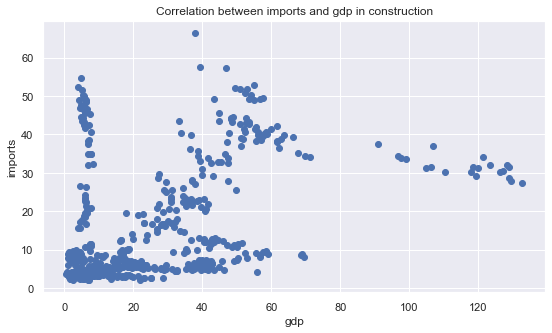

In [44]:
#Ploting a scatter plot to stablish if there is any correlation between two variables

fig, ax = plt.subplots(figsize=(9,5)) 
#sns.set_style('whitegrid')
ax.scatter(const1['imports'], const1['gdp']) 
ax.set_xlabel('gdp') 
ax.set_ylabel('imports') 
plt.title("Correlation between imports and gdp in construction");
plt.show() 

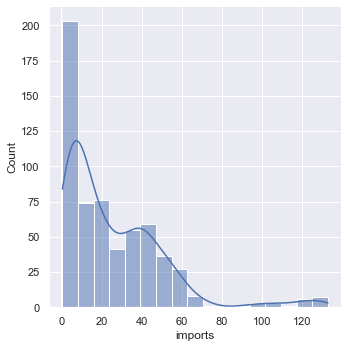

In [46]:
# Visualizing the Planning_Permissions_Unit_Perm variable
# It can be seen that data is positive skewed in this feature.
sns.displot(data=const1, x="imports", kde=True);

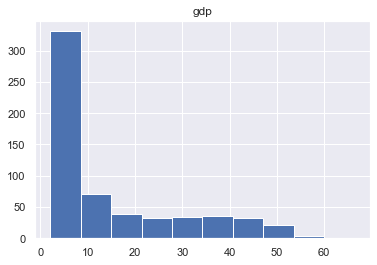

In [47]:
# Visualizing a histogram to verify the shape of the data. It is positive skewed
const1.hist(column='gdp');

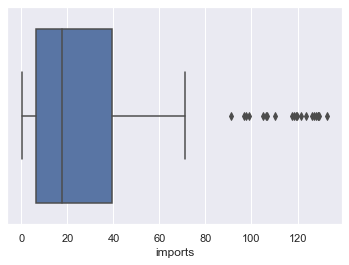

In [48]:
# Detecting Outliers
# As it can be seen below, there are ouliers in each of the variables of my dataset.
sns.boxplot(x=const1['imports']); 

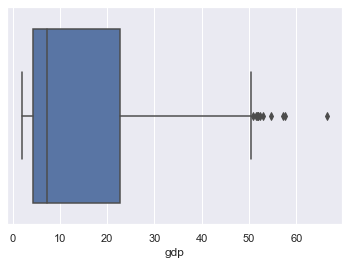

In [49]:
# Detecting Outliers
# As it can be seen below, there are ouliers in each of the variables of my dataset.
sns.boxplot(x=const1['gdp']); 